<a href="https://colab.research.google.com/github/MonitSharma/Quantum-Finance-and-Numerical-Methods/blob/main/Quantum_Speedups_in_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will gain the following skills:

1. Understand the basics of how financial instruments are typically priced using the Monte Carlo Methods

2. Implement a quantum algorithm to price a financial instrument

3. Understand the pros/cons of using the quantum approach

## Introduction

The world of finance is a complicated one to model and predict. The financial markets, in particular, are influenced by so many external factors and contain multiple different investors with different objectives. This means that traditional modelling techniques, like multiple linear regression, often struggle when trying to explain investors' behaviours or perform certain tasks in finance, such as predicting the price of a stock. Due to these complexities, we need more sophisticated models and numerous techniques have been proposed to produce such robust models for financial instruments like stocks.

------------


Here, we introduce a common pricing technique for a particular instrument called an option. This technique rests on Monte Carlo sampling which we show can achieve a quadratic speed up in pricing the option by replacing the classical Monte Carlo sampling approach with a quantum algorithm that leverages quantum effects to compute things faster.

## Financial Instrument

A financial instrument is any asset that can be traded between various parties. For example, shares of a company are equity instruments, and debt, cash and even contracts can be considered as financial instruments.

In general, we can divide financial instruments into several categories, such as cash instruments, asset or debt-based instruments and derivative instruments

In this tutorial we will basically work with **derivative instrument**.

---------------

These instruments get their name from the fact that their price is derived based on the price of a separate underlying quantity. In particular, we will consider derivatives called European options.




## Option Contracts

Options are financial derivatives that are defined explicitly by contracts. These contracts give the buyer of the option the right, but not the obligation, to buy or sell a specific underlying asset at an agreed-upon price something in future.

1. Options that give buyer the right to *buy* the underlying asset are called **call options**

2. Options that give the buyer the right to *sell* the underlying asset are called **put options**

In both cases, the price to buy or sell the asset at, is agreed upon in the contract and called the **strike price**.




## An example for Illustration

Let's assume that the share price of a company called $ABC$ is currently trading at $S_0 = \$50 $. You believe that in $1$ month time, the share price will double to $\$100$.

You can either buy the share now for $\$50$ , or you could buy a $1-$month call option for a much cheaper price of $\$5$.

If the price of the $ABC$ share does indeed double in $1$ month time, then you can exercise your option right to buy the $ABC$ share at the agreed up strike price ( which will be lower than the actual share price)

-----------

Recall that the current price of $ABC$ is $S_0 = \$50$, A $1$ month call option with a strike price of $K= \$ 80$ is available to purchse for $P_{call} = \$ 5 $.

------------

Let's consider the scenarios of buying an $ABC$ share today or the call option.




### Today:

Scenario 1: Buying a share of $ABC$ today, investment $S_0 = \$ 50$

Scenario 2: Buying a 1 month call option on $ABC$ investment $P_{call} = \$ 5$


-----
#### In 1-months tume:

Since option contracts are valid for a pre-determined period of time, their value at the expiration date is called the *payoff*. Technically, the price of an $ABC$ share could be trading at any value $\ge \$0$.

Let's imagine that the price after 1 month $S_t$ can be $\$40, \$60 , \$100$, and we'll look at the payoffs:

1. $S_t = \$40$

Since you own the share and purchased it at $\$50$ , you will lose $\$10$, and the payoff will be a loss, $-\$10$

If you went for the call in option, the strike price is higher than the actual share price, thus you would not execute the option to buy $ABC$ at $K= \$80$, when you can purchase the share at $\$40$, you will lose out on the price you paid for the call option and so the payoff will again be a loss but of $-\$ 5$


2. $S_t = \$60$

The payoff will be the profit you made from buying the share at $\$50$ and it's current price, hence a profit of $\$10$

The strike price is still higher than the share price, thus you would not execute the option and lose $\$5$

3. $S_t = \$100$

The payoff will be a profit of $\$50$

Here the strike price is lower than the market price, so it makes sense to execute the option and the total payoff is $\$100 - \$80- \$5 = \$15$

---




At this stage, you might be wondering why buy the option at all? And it kind of seems like betting? What's important to keep in mind is the initial investment you have to put up in order to buy the actual ABC share vs buying the call option. Buying the share requires a much higher investment and you run the risk of losing a lot more money if the share price drops below the price you initially paid for it. Whereas with the option, if the share price drops below the strike price, you can just let the option expire and lose a maximum of 5 ZAR (the price you paid for the option). There are also other reasons to purchase options, such as hedging against risk or offsetting other trades. In general, you can read more about these strategies [here](https://www.investopedia.com/trading/options-strategies/) 

## Pricing Options

Previously, we said the price of a 1-month call option linked to the ABC share price was $\$5$. But is that price fair? And how would be go about determining the fair price of these options in general?


----------------


If we think about what should affect the fair price of an option, it boils down to understanding the what the price of the underlying asset it is linked to will be in the future. Due to the random (also called stochastic) nature of most of the parameters that go into pricing the underlying assets that options are defined on, calculating the fair price can be a difficult task, and whilst analytical models exist for the basic types of options, the simplifying assumptions required for these models often limit their applicability. Thus, numerical methods that estimate the fair price have to be employed for option pricing, with Monte Carlo being one of the most popular.

## How does Monte Carlo works?

Monte Carlo methods are a class of computational algorithms that are based on random sampling and repeated computation. At a high level, imagine you have a function (or equation) that is described by multiple variables and you're interested in solving that function, but it is analytically difficult to do so because the function depends on lots of complicated variables.

--------------------

A Monte Carlo approach simply samples random values for the parameters of your function from an underlying distribution and computes the function multiple times, each time using a different set of randomly sampled values. In doing so, we can obtain an expected value for the function we are trying to evaluate by taking an average over all the computed values of the function. This allows us to estimate function values without having to analytically solve them directly


## Monte Carlo in Finance

Monte Carlo simulation is often used in finance to value and analyse instruments, portfolios and investments by simulating the sources of uncertainty that affect their value. Read [here](https://www.cmi.ac.in/~shariq/Shariq%20files/option_pricing.pdf).



In the case of options, Monte Carlo methods are used to develop a price distribution for the underlying asset. If we have a price distribution of the underlying asset, then we can begin to get a sense of what the fair price for the option should be.

To illustrate this, we have to first make assumptions about the factors that could influence the price of the underlying asset and hence, influence the value of the option.


## Monte Carlo methods for Option Pricing

The goal of option pricing is to estimate the option's payoff at the expiration date. In other words, how much profit can you expect to make from the option? If the underlying asset's price is expected to go up a lot, then you can expect to make more money if you can buy the underlying asset at a cheap price when it is worth a lot. In that case, the option price should be high since the option to buy the underlying asset at a cheaper price is quite valuable.


----------

The steps to price an option are as follows:

1. Model the price of the underlying asset which the option is based on, and any other source of uncertainity as random variables $\textbf{X}=\{X_1, X_2, . . . , X_N\}$ which follows a stochastic process.

2. Generate a large number $M$ of random values which can serve as price paths $\{X_1, X_2, . . . , X_N\}$ for the underlying asset. These random varlues should be drawn from the probability distrbutin implied by the stochastic process. Let's call this distribution $\mathbb{P}$

3. Once we have lots of simulated price paths for the underlying asset, we can calculate the option’s payoff for each of the generated price paths, which we can label as $ f(\textbf{X}_i)$ . Then we can compute an estimator for the expectation value of the payoff as an average across all paths, i.e $\mathbb{E_P)$ can be approximated by 

$$ \mathbb{\hat{E}}_\mathbb{P}[f(\textbf{X})]= \frac{1}{M}\sum_{i=1}^M f(\textbf{X}_i) $$


4. Lastly, discount the calculated expectation value to get the option's fair value today.

In step 4, the discounting process requires knowledge of interest rates at future dates which is itself an important question from a financial modelling perspective. However, for the types of options we consider, this process is not computationally challenging and can be performed classically after the payoff calculation. We therefore do not discount the expected payoff for simplicity and can ignore step 4.

In [1]:
%pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 7.5 MB/s 
     |████████████████████████████████| 12.8 MB 42.1 MB/s 
     |████████████████████████████████| 240 kB 70.9 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 106 kB 74.9 MB/s 
     |████████████████████████████████| 37.5 MB 543 kB/s 
     |████████████████████████████████| 49 kB 7.5 MB/s 
     |████████████████████████████████| 929 kB 59.4 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 4.0 MB 71.7 MB/s 
     |████████████████████████████████| 1.9 MB 42.2 MB/s 
     |████████████████████████████████| 112 kB 60.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.4-py3-none-any.whl size=12274 sha256=269b483e27d2821b60a649b02a97dd6e25a60a67db696cb7f44d2c665f1a1e77
  Stored in directory: /root/.cache/pip/wheels/40/2c/d7/aa04

### Classical Monte Carlo

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's look at a $1$ month call option. We can formulate the expected payoff in $1$ months time, and hence the price of the call option as follows :
$$ P_{call} = \text{max}(S_T - K,0) $$

where $S_T$ is the price of the share in $T=1$ month and $K$ is the pre-agreed upon strike price.

-------------

Since we know $K$ and $T$ , we need to estimate $S_T$, we need to use Monte carlo methods to estimate share price in $1$ month, But what function can sample from in order to get Monte Carlo estimate ?


-------------

In financial literature, there are several results that help us answer this question. Share prices are often assumed to follow a random process called a Generalised Wiener Process. We can use this random process to create lots of estimates for the price of a share. Let's assume we expect to have roughly a positive return postive return for the month of $r= 0.05$ and there will be some volatility around this return which we denote as $\sigma = 0.4$. Then, the change in the share price, $dS_T$ can be written as 

$$ dS_T = rS_TdT + \sigma S_T dW_T $$, 
where $dW_T$ is a Wiener process. Using a convenient result called Ito's lemma, we can derive the formula for the share price at time $T$ as 

$$ S_T = S_0e^{(r-\frac{1}{2}\sigma^2)T + \sigma \sqrt{T}W_T} $$

where $S_0$ is the price of share today. Thus often shares are modelled using log-normal distributions.



In [3]:
# monte carlo valuation

# set a random varibale to reproduce our result 
np.random.seed(135)

# set the parameters
S0 = 50 # initial price of the share
K = 55 # strike price

r = 0.05 # average return of the underlying asset
sigma = 0.4 # volatality
T = 1 # time till execution
t = 30 # number of time steps (basically days in months)
dt = T/t # incremental step size
M = 1000 # number of paths to simulate

# simulating M price paths with t time steps
# sum instead of cumsum would also do if only the final values at end of the
# month (i.e. at time T) are of interest
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt)* np.random.standard_normal((t + 1, M)), axis=0))

# Calculating the Monte Carlo estimator for the expected payoff

P_call = sum(np.maximum(S[-1]-K,0))/M

# result

print("The call option values is: ${:0.4f} .\n".format(P_call))

The call option values is: $8.1437 .



Let's visualize the multiple paths that the underlying share price could take. The resulting call option is calculated using an average of these paths.

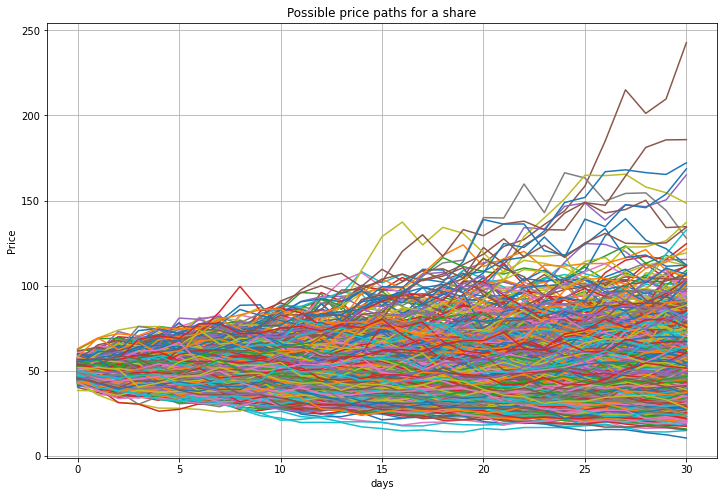

In [4]:
num_paths_to_plot = M
plt.figure(figsize= (12,8))
plt.plot(S[:, :num_paths_to_plot])
plt.grid(True)
plt.xlabel('days')
plt.ylabel('Price')
plt.title('Possible price paths for a share')
plt.show()

Let's investigate the frequency of the simulated index levels at the end of the simulation period

Text(0, 0.5, 'frequency')

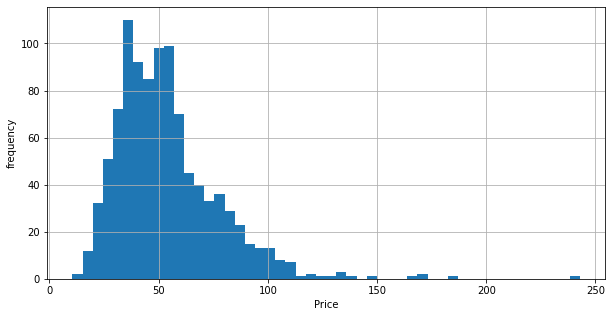

In [5]:
plt.figure(figsize= (10,5))
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('frequency')

Let’s look at the histogram of all simulated end-of-period option values

Text(0, 0.5, 'frequency')

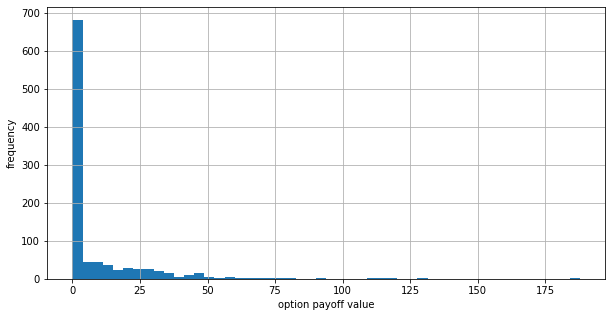

In [6]:
plt.figure(figsize= (10,5))
plt.hist(np.maximum(S[-1] - K, 0), bins=50)
plt.grid(True)
plt.xlabel('option payoff value')
plt.ylabel('frequency')


# The Quantum Approach
Traditional Monte Carlo methods generally require extensive computational resources. By leveraging the laws of quantum mechanics, a quantum computer may provide novel ways to solve computationally intensive problems.


Quantitative finance may benefit from quantum computing in many ways. Recently developed applications of gate-based quantum computing algorithms for use in finance include portfolio optimisation, the calculation of risk measures and pricing derivatives. Several of these applications are based on an algorithm called Amplitude Estimation, which can estimate a parameter's value with a convergence rate in the order of $\mathcal{O}(M^{-1})$ where $M$ is the number of samples required, This represents a theoretical quadratic speed-up compared to Monte Carlo methods that run on classical computers with a convergence rate of $\mathcal{O}(M^{-1/2})$



## Pricing Option with Qauantum Amplitude Estimtion

If we were to swap out the Monte Carlo estimate for the underlying share price and use Amplitude Estimation, the building blocks needed to price the option on a gate-based quantum computers are the following:

1. Represent the probability distribution $\mathbb{P}$ describing the evolution of the share price on the Quantum Computer

2. Construct the quantum model which computes the payoff of the option $f(\text{X})$

3. Calculate the expectation value of the payoff $ \mathbb{E_P}[f(\text{X})] $





In the paper [Quantum Risk Analysis](https://arxiv.org/abs/1806.06893) you can find a detailed description of how to use Amplitude Estimation to calculate the expectation value of a function of [random variable](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/random-variables-discrete/v/random-variables), how to load a relevant probability distribution to a quantum register and then construction of the quantum circuits needed to compute the payoff and set up Amplitude Estimation to estimate the expectation value of the payoff.


----

Continuing with our example of $1$ month call option based on the share price of $S_T$ and a strike price $K$ recall that the corresponding payoff function is defined as :

$$ f(S_T)=\max(S_T - K, 0). $$


We know that the price os this type of option depends only on the distribution of $S_T$. 

$$ \mathbb{E}\left[ \max(S_T - K, 0) \right] $$

In [7]:
%pip install qiskit[finance]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.5 MB/s 
     |████████████████████████████████| 159 kB 14.8 MB/s 
     |████████████████████████████████| 640 kB 46.7 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for docplex: filename=docplex-2.24.232-py3-none-any.whl size=682306 sha256=a2e08268738ab86c5b2882a9a57e4d2adac14bd618161eeac49943de5c6664de
  Stored in directory: /root/.cache/pip/wheels/cd/84/5d/b9c307d9cf361c49d41ddea36761e226bba3afdfd038673dcd
Successfully built docplex
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [8]:
# quantum lib

from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import IterativeAmplitudeEstimation
from qiskit_finance.circuit.library import LogNormalDistribution,EuropeanCallPricingObjective


     

### Distribution Loading

The first component of our option pricing model is to create a quantum circuit that takes in the probability distribution implied for the possible share prices in 1 months time and loads it into a register such that each basis state represents a possible share value and its amplitude, the corresponding probability of the share having that value.

----

In this notebook, we construct a circuit factory to load a log-normal probability distribution for the share price into a quantum state. The share price distribution is truncated to a given interval [low, high],and discretised using $2^n$ grid points, where $n$ denotes the number of qubits used.


-----

Essentially we want to represent a probability distribution of our underlying share price as a quantum state. Thus, we reduce the the distribution to an interval we deem relevant and "slice" the possible values in between this interval. The number of slices we make will depend on how many qubits we have. If we have $n$ qubits, this means we have $2^n$
 equally spaced slices in the interval. Each slice corresponds to a certain share price which we can then associate with a possible basis state. Thus, the more qubits we have, the more possible basis states we will have and the more slices we can create. Let's look at an example.





## Quantum Uncertainty Model



In [9]:
# number of qubits to represent the uncertainity / distribution

num_uncertainty_qubits = 4

# parameters
S = 50 # initial price
strike_price = 55
vol = 0.4 # volatility of  40%
r = 0.05 # annual interest rate of 5%
T = 30/365 # 30 days to maturity

# resulting parameters

mu = ((r-0.5 * vol**2) * T + np.log(S))
sigma = vol * np.sqrt(T)
mean = np.exp(mu + sigma**2/2)
variance = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
stddev = np.sqrt(variance)


# lowest and highest value considered for the spot price; in between, an equidistant discretization is considered.
# we truncate the distribution to the interval defined by 2 standard deviations around the mean
low  = np.maximum(0, mean - 2*stddev) 
high = mean + 2*stddev


# construct circuit factory for uncertainty model
uncertainty_model = LogNormalDistribution(num_uncertainty_qubits, mu=mu, sigma=sigma**2, bounds=(low, high))


     


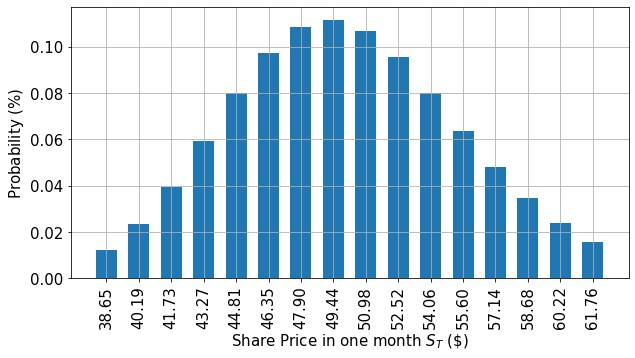

In [10]:
# plot probability distribution
x = uncertainty_model.values
y = uncertainty_model.probabilities
plt.figure(figsize= (10,5))
plt.bar(x, y, width=1)
plt.xticks(x, size=15, rotation=90)
plt.yticks(size=15)
plt.grid()
plt.xlabel('Share Price in one month $S_T$ (\$)', size=15)
plt.ylabel('Probability ($\%$)', size=15)
plt.show()


## Payoff Function

Let's have a look at the payoff function for our  option. Recall that the payoff function equals zero as long as the share price in 1 months time, $S_T$
, is less than the strike price $K$  and then increases linearly thereafter. The code below illustrates this.


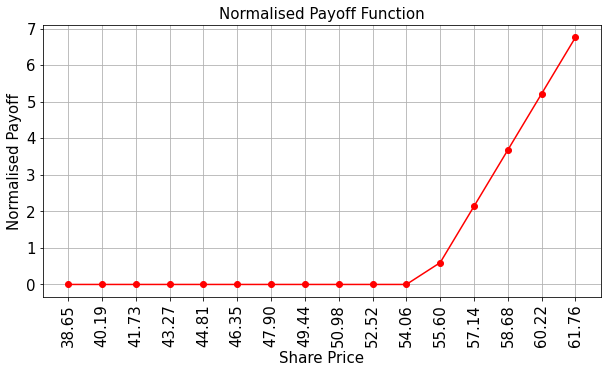

In [11]:
# plot exact payoff function (evaluated on the grid of the uncertainty model)
x = uncertainty_model.values
y = np.maximum(0, x - strike_price)
plt.figure(figsize= (10,5))
plt.plot(x, y, 'ro-')
plt.grid()
plt.title('Normalised Payoff Function', size=15)
plt.xlabel('Share Price', size=15)
plt.ylabel('Normalised Payoff', size=15)
plt.xticks(x, size=15, rotation=90)
plt.yticks(size=15)
plt.show()

## Evaluate the Expected Payoff

Lastly, we can use Quantum Amplitude Estimation to compute the expected payoff of the option. Thanks to built-in Qiskit algorithms, we can use the `EuropeanCallPricing` and `IterativeAmplitudeEstimation` functions to achieve this.

In [12]:
from qiskit_finance.applications.estimation import EuropeanCallPricing

european_call_pricing = EuropeanCallPricing(num_state_qubits=num_uncertainty_qubits,
                                            strike_price=strike_price,
                                            rescaling_factor=0.25,
                                            bounds=(low, high),
                                            uncertainty_model=uncertainty_model)


In [13]:
# set target precision and confidence level
epsilon = 0.01
alpha = 0.05
shots = 100
simulator = 'qasm_simulator'

qi = QuantumInstance(Aer.get_backend(simulator), shots=shots, seed_simulator=42, seed_transpiler=42)
problem = european_call_pricing.to_estimation_problem()

# construct amplitude estimation
ae = IterativeAmplitudeEstimation(epsilon, alpha=alpha, quantum_instance=qi)
result = ae.estimate(problem)

Since this example is simple enough to calculate by hand, we can compute the exact expected value of the option and compare it to the result of Amplitude Estimation using a quantum approach.


We can also create a confidence interval around our quantum solution. Recall that we are modelling probability distributions which are inherently random. Thus, if we want, we can instead provide a range of values for our option price instead of just one fixed value


Below is the exact value, followed by the estimated value of the option using Amplitude Estimation. The estimation error is simply the difference between the exact and estimated values. And finally, the confidence interval provides a range of values which the model predicts the final output to lie, based on the value of alpha.

In [14]:
# evaluate exact expected value (normalized to the [0, 1] interval)
exact_value = np.dot(uncertainty_model.probabilities, y)

conf_int = np.array(result.confidence_interval_processed)
print('Exact value:        \t%.4f' % exact_value)
print('Estimated value:    \t%.4f' % (european_call_pricing.interpret(result)))
print('Estimation error:    \t%.4f' %(np.abs(exact_value-european_call_pricing.interpret(result))))
print('Confidence interval:\t[%.4f, %.4f]' % tuple(conf_int))



Exact value:        	0.4989
Estimated value:    	0.5627
Estimation error:    	0.0637
Confidence interval:	[0.5165, 0.6088]


Ideally, we would want our model's estimated value to be as close as possible to the exact value. Thus, we would want to minimise the estimation error as much as possible.

In [15]:
num_uncertainty_qubits = 4
low  = np.maximum(0, mean - 2*stddev) 
high = mean + 2*stddev
epsilon = 0.05
alpha = 0.05
shots = 100
simulator = 'qasm_simulator'

# Run this cell once you are ready to submit your answer



solutions = [num_uncertainty_qubits, low, high, epsilon, alpha, shots, simulator]


solutions

[4, 38.65307337259516, 61.75873112556994, 0.05, 0.05, 100, 'qasm_simulator']

Recall that we have different types of option, what we have implemented so far is the European Call option. 

Now let us try to implement the European put option

In [23]:
num_uncertainty_qubits = 4
S = 200 # initial spot price
vol = 0.3 # volatility of 30%
r = 0.08 # annual interest rate of 4%
T = 60 / 365 # 60 days to maturity
strike_price = 230
epsilon = 0.01
alpha = 0.05
shots = 100
simulator = 'qasm_simulator'

# set the approximation scaling for the payoff function
rescaling_factor = 0.25

# resulting parameters for log-normal distribution
mu = ((r - 0.5 * vol**2) * T + np.log(S))
sigma = vol * np.sqrt(T)
mean = np.exp(mu + sigma**2/2)
variance = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
stddev = np.sqrt(variance)
low  = np.maximum(0, mean - 2*stddev) 
high = mean + 2*stddev
breakpoints = [low, high]
slopes = [-1, 0]
offsets = [strike_price - low, 0]
f_min = 0
f_max = strike_price - low


In [24]:
# The distribution loading step will be the same for the underlying asset, in this case the QuantumTech share 

uncertainty_model =  LogNormalDistribution(num_uncertainty_qubits, mu=mu, sigma=sigma**2, bounds=(low, high))


     

In [25]:
from qiskit.circuit.library import  LinearAmplitudeFunction

# setup piecewise linear objective function, the LinearAmplitudeFunction


#european_put_objective = LinearAmplitudeFunction('insert parameters here')

european_put_objective = LinearAmplitudeFunction(
    num_uncertainty_qubits,
    slopes,
    offsets,
    domain=(low, high),
    image=(f_min, f_max),
    breakpoints=breakpoints,
    rescaling_factor=rescaling_factor,
)


In [26]:
# construct A operator for QAE for the payoff function by
# composing the uncertainty model and the objective
european_put = european_put_objective.compose(uncertainty_model, front=True)

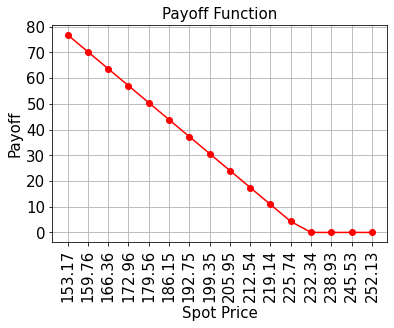

In [27]:
# plot exact payoff function (evaluated on the grid of the uncertainty model)
x = uncertainty_model.values
y = np.maximum(0, strike_price - x)
plt.plot(x, y, "ro-")
plt.grid()
plt.title("Payoff Function", size=15)
plt.xlabel("Spot Price", size=15)
plt.ylabel("Payoff", size=15)
plt.xticks(x, size=15, rotation=90)
plt.yticks(size=15)
plt.show()

In [28]:
# evaluate exact expected value (normalized to the [0, 1] interval)
exact_value = np.dot(uncertainty_model.probabilities, y)
exact_delta = -sum(uncertainty_model.probabilities[x <= strike_price])
print("exact expected value:\t%.4f" % exact_value)
print("exact delta value:   \t%.4f" % exact_delta)

exact expected value:	29.6875
exact delta value:   	-0.8783


## Evaluate Expected Payoff

In [30]:
from qiskit.algorithms import IterativeAmplitudeEstimation, EstimationProblem
# set target precision and confidence level
epsilon = 0.01
alpha = 0.05

qi = QuantumInstance(Aer.get_backend("aer_simulator"), shots=100)
problem = EstimationProblem(
    state_preparation=european_put,
    objective_qubits=[num_uncertainty_qubits],
    post_processing=european_put_objective.post_processing,
)
# construct amplitude estimation
ae = IterativeAmplitudeEstimation(epsilon, alpha=alpha, quantum_instance=qi)

In [31]:
result = ae.estimate(problem)

In [32]:
conf_int = np.array(result.confidence_interval_processed)
print("Exact value:        \t%.4f" % exact_value)
print("Estimated value:    \t%.4f" % (result.estimation_processed))
print("Confidence interval:\t[%.4f, %.4f]" % tuple(conf_int))

Exact value:        	29.6875
Estimated value:    	30.0380
Confidence interval:	[28.2682, 31.8077]


## Evaluate Delta

The Delta is a bit simpler to evaluate than the expected payoff. Similarly to the expected payoff, we use a comparator circuit and an ancilla qubit to identify the cases where $S_T \le K$ . However, since we are only interested in the (negative) probability of this condition being true, we can directly use this ancilla qubit as the objective qubit in amplitude estimation without any further approximation.



In [33]:
# setup piecewise linear objective fcuntion
breakpoints = [low, strike_price]
slopes = [0, 0]
offsets = [1, 0]
f_min = 0
f_max = 1

european_put_delta_objective = LinearAmplitudeFunction(
    num_uncertainty_qubits,
    slopes,
    offsets,
    domain=(low, high),
    image=(f_min, f_max),
    breakpoints=breakpoints,
)

# construct circuit for payoff function
european_put_delta = european_put_delta_objective.compose(uncertainty_model, front=True)

In [34]:
# set target precision and confidence level
epsilon = 0.01
alpha = 0.05

qi = QuantumInstance(Aer.get_backend("aer_simulator"), shots=100)
problem = EstimationProblem(
    state_preparation=european_put_delta, objective_qubits=[num_uncertainty_qubits]
)
# construct amplitude estimation
ae_delta = IterativeAmplitudeEstimation(epsilon, alpha=alpha, quantum_instance=qi)

In [35]:
result_delta = ae_delta.estimate(problem)

In [36]:
conf_int = -np.array(result_delta.confidence_interval)[::-1]
print("Exact delta:    \t%.4f" % exact_delta)
print("Esimated value: \t%.4f" % -result_delta.estimation)
print("Confidence interval: \t[%.4f, %.4f]" % tuple(conf_int))

Exact delta:    	-0.8783
Esimated value: 	-0.8804
Confidence interval: 	[-0.8864, -0.8744]
